In [41]:
!pip install yellowbrick  
!pip install catboost
!pip install scikit-learn
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension
import numpy as np                       
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [69]:
df = pd.read_csv('data.csv')


In [70]:
df
data = df.drop(labels=['Country','Status','Year'], axis = 1)

In [1]:
data=data.fillna(0)

NameError: ignored

In [72]:
X = data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
pca = PCA(n_components = 5)
pca.fit(X)
X_3 = pca.transform(X)

X_3 = pd.DataFrame(X_3)
col = ['PC%s' % _ for _ in range(1, 6)]
X_3['Country'] = df['Country']
X_3.head()

,0,1,2,3,4,Country
0,-0.167552,-0.120880,-0.011775,0.036927,-0.065740,Afghanistan
1,-0.166840,-0.122721,-0.010264,0.026817,-0.065275,Afghanistan
2,-0.168976,-0.123060,-0.009857,0.025772,-0.065200,Afghanistan
3,-0.171665,-0.123641,-0.008867,0.024469,-0.065436,Afghanistan
4,-0.172878,-0.122919,-0.008209,0.025256,-0.071673,Afghanistan


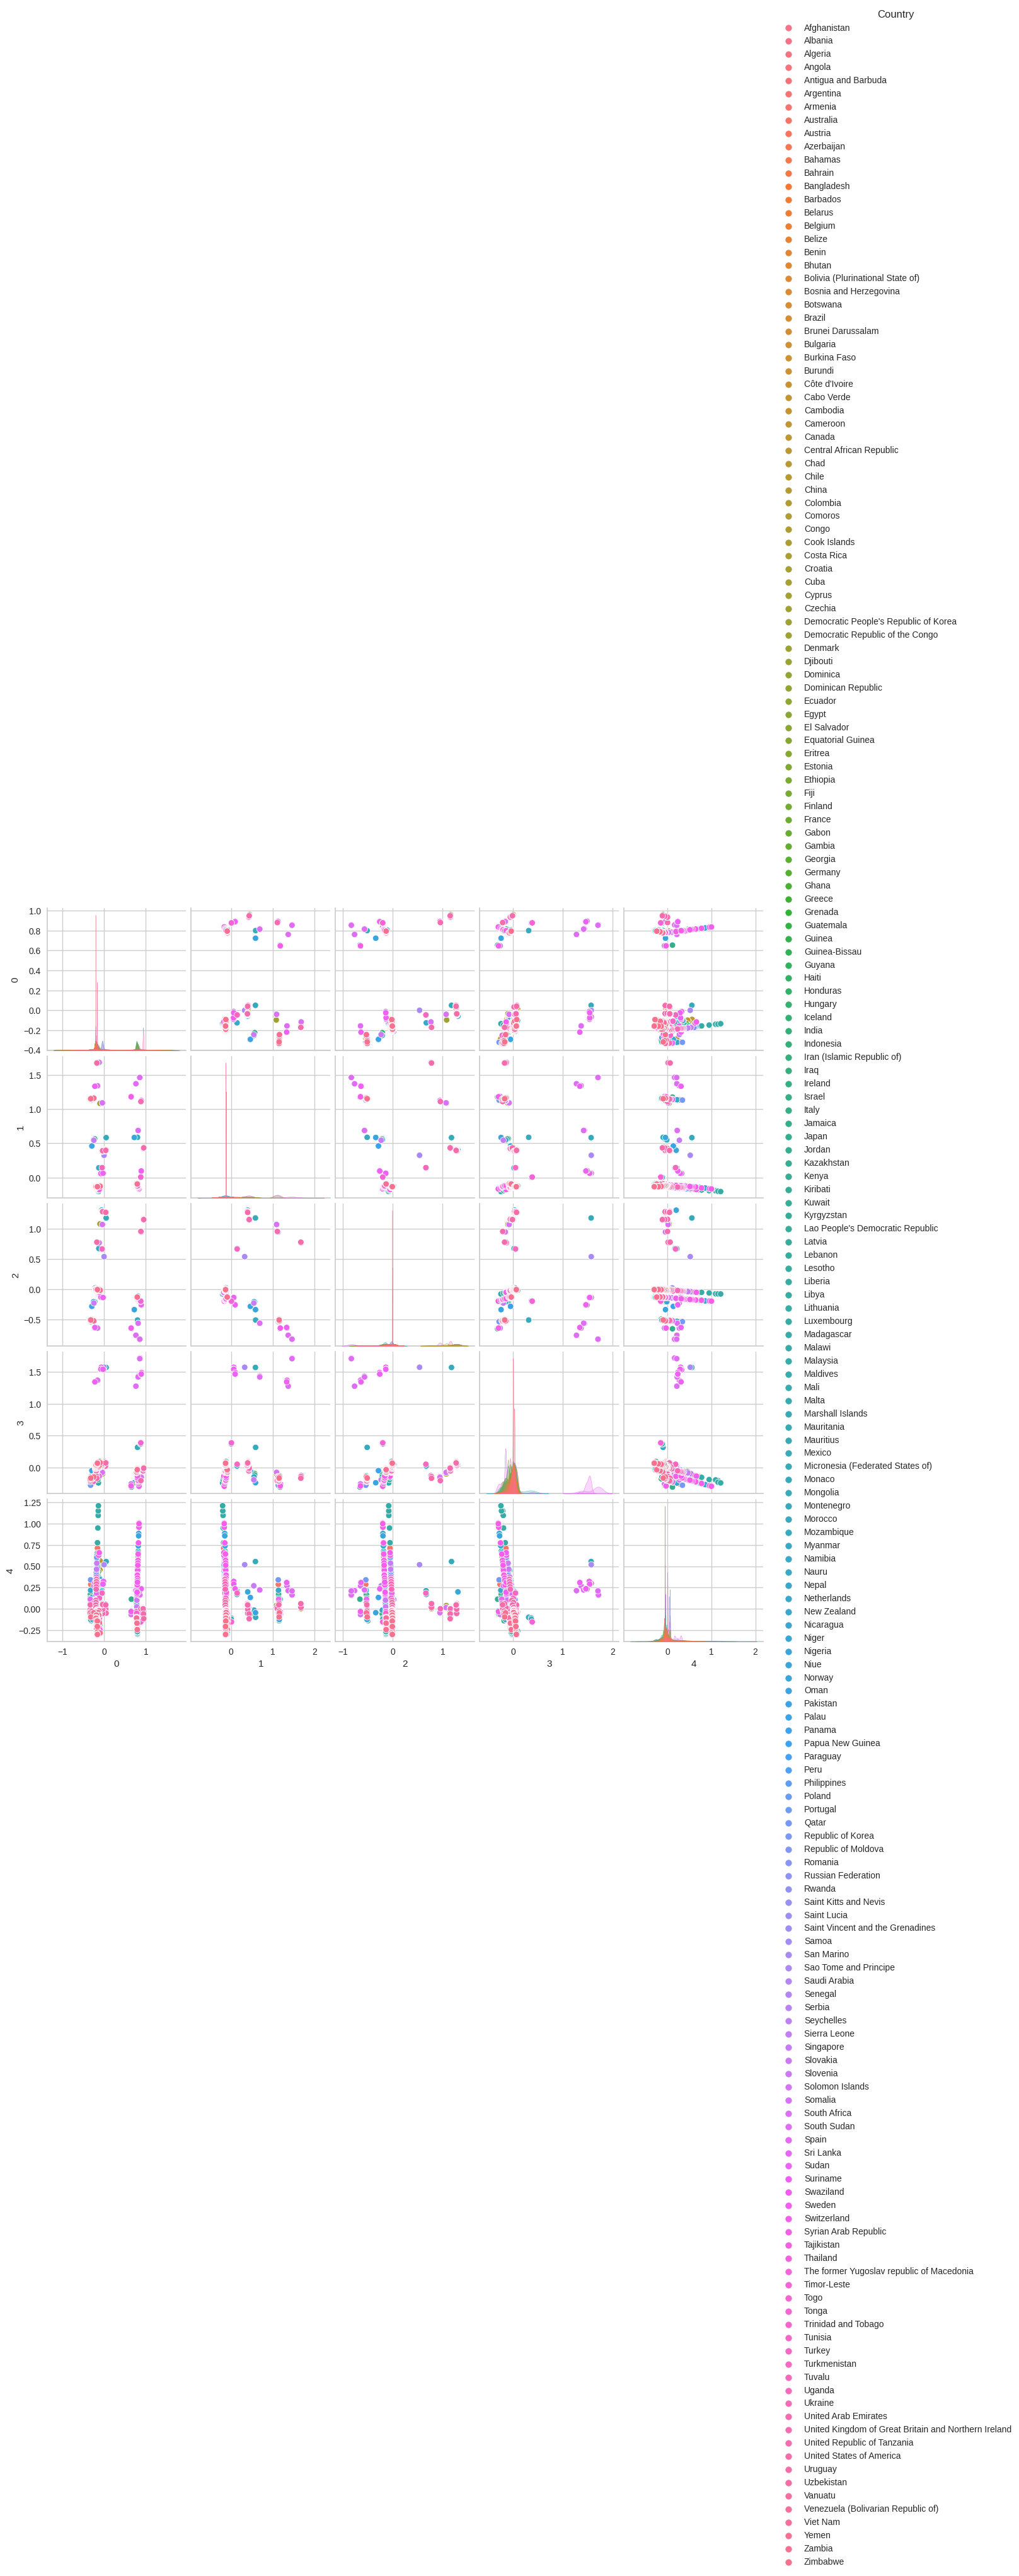

In [73]:
sns.pairplot(X_3, hue="Country");

In [76]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(X)
iris_km = pd.DataFrame(X_3, columns=col)
iris_km['Country'] = kmeans.labels_
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

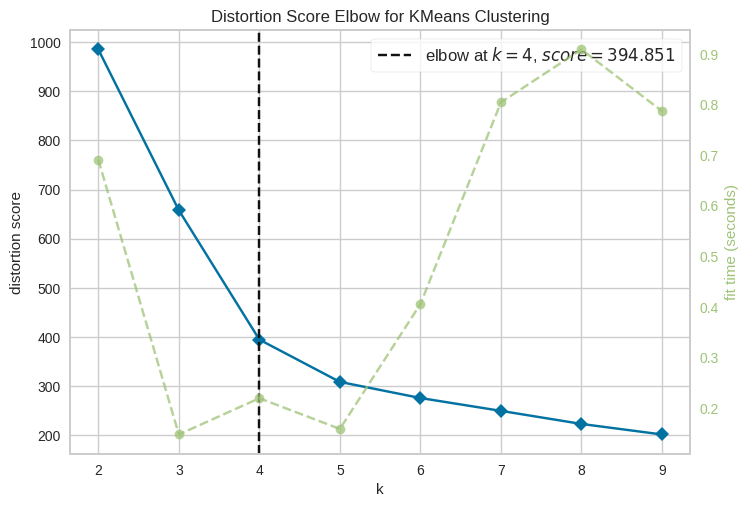

In [77]:
km = KMeans(random_state=0)
visualizer = KElbowVisualizer(km, k=(2, 10))
visualizer.fit(X)
visualizer.show();

In [78]:
af = AffinityPropagation(preference=-5, random_state=0).fit(X)
iris_af = pd.DataFrame(X_3, columns=col)
iris_af['Country'] = af.labels_
af.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


array([   0,    1,    2, ..., 1957, 1957, 1957])

In [79]:
db = DBSCAN(eps=0.7, min_samples=5).fit(X)


In [89]:
df[kmeans.labels_==1]#HIV/AIDS	

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
44,Algeria,2003,Developing,71.7,146.0,20,0.34,25.018523,NaN,15374,...,87.0,3.60,87.0,0.1,294.335560,3243514.0,6.3,6.1,0.663,11.5
45,Algeria,2002,Developing,71.6,145.0,20,0.36,148.511984,NaN,5862,...,86.0,3.73,86.0,0.1,1774.336730,3199546.0,6.3,6.2,0.653,11.1
46,Algeria,2001,Developing,71.4,145.0,20,0.23,147.986071,NaN,2686,...,89.0,3.84,89.0,0.1,1732.857979,31592153.0,6.4,6.3,0.644,10.9
47,Algeria,2000,Developing,71.3,145.0,21,0.25,154.455944,NaN,0,...,86.0,3.49,86.0,0.1,1757.177970,3118366.0,6.5,6.4,0.636,10.7
57,Angola,2006,Developing,47.7,381.0,90,5.84,25.086888,NaN,765,...,36.0,4.54,34.0,2.5,262.415149,2262399.0,9.8,9.7,0.439,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,Zambia,2004,Developing,47.9,578.0,36,2.46,8.369852,NaN,35,...,84.0,7.33,83.0,17.6,53.277222,11731746.0,7.2,7.1,0.456,10.5
2918,Zambia,2003,Developing,46.4,64.0,39,2.33,65.789974,NaN,881,...,85.0,8.18,83.0,18.2,429.158343,11421984.0,7.3,7.2,0.443,10.2
2919,Zambia,2002,Developing,45.5,69.0,41,2.44,54.043480,NaN,25036,...,85.0,6.93,84.0,18.4,377.135244,111249.0,7.4,7.3,0.433,10.0
2920,Zambia,2001,Developing,44.6,611.0,43,2.61,46.830275,NaN,16997,...,86.0,6.56,85.0,18.6,378.273624,1824125.0,7.4,7.4,0.424,9.8


In [88]:
df[kmeans.labels_==2]#percentage expenditure

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.0,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.0,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.0,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
80,Argentina,2015,Developing,76.3,116.0,8,NaN,0.0,94.0,0,...,93.0,NaN,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3
96,Armenia,2015,Developing,74.8,118.0,1,NaN,0.0,94.0,33,...,96.0,NaN,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,NaN,0.0,87.0,0,...,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,NaN,0.0,97.0,256,...,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.0,69.0,468,...,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,NaN,0.0,9.0,9,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [90]:
df[kmeans.labels_==3]#polio

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
432,Côte d'Ivoire,2015,Developing,53.3,397.0,57,NaN,0.0,83.0,65,...,81.0,NaN,83.0,1.9,NaN,NaN,5.5,5.5,NaN,NaN
433,Côte d'Ivoire,2014,Developing,52.8,47.0,58,0.01,0.0,76.0,50,...,76.0,5.72,76.0,2.0,NaN,NaN,5.6,5.6,NaN,NaN
434,Côte d'Ivoire,2013,Developing,52.3,412.0,59,3.15,0.0,8.0,48,...,79.0,5.81,8.0,2.4,NaN,NaN,5.8,5.7,NaN,NaN
435,Côte d'Ivoire,2012,Developing,52.0,415.0,59,3.24,0.0,82.0,137,...,83.0,6.14,82.0,2.9,NaN,NaN,5.9,5.9,NaN,NaN
436,Côte d'Ivoire,2011,Developing,51.7,419.0,60,3.13,0.0,62.0,628,...,58.0,6.42,62.0,3.3,NaN,NaN,6.1,6.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,United States of America,2004,Developed,77.5,111.0,28,8.48,0.0,92.0,37,...,92.0,15.14,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2806,United States of America,2003,Developed,77.2,114.0,28,8.40,0.0,92.0,56,...,91.0,15.60,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2807,United States of America,2002,Developed,77.0,115.0,28,8.33,0.0,88.0,41,...,9.0,14.55,94.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN
2808,United States of America,2001,Developed,76.9,115.0,28,8.25,0.0,89.0,116,...,89.0,13.73,94.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN


In [91]:
df[kmeans.labels_==4]#infant deaths

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2409,South Sudan,2015,Developing,57.3,332.0,26,NaN,0.000000,31.0,878,...,41.0,NaN,31.0,3.4,758.725782,11882136.0,NaN,NaN,0.421,4.9
2410,South Sudan,2014,Developing,56.6,343.0,26,NaN,46.074469,NaN,441,...,44.0,2.74,39.0,3.5,1151.861715,1153971.0,NaN,NaN,0.421,4.9
2411,South Sudan,2013,Developing,56.4,345.0,26,NaN,47.444530,NaN,525,...,5.0,2.62,45.0,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9
2412,South Sudan,2012,Developing,56.0,347.0,26,NaN,38.338232,NaN,1952,...,64.0,2.77,59.0,3.8,958.455810,1818258.0,NaN,NaN,0.419,4.9
2413,South Sudan,2011,Developing,55.4,355.0,27,NaN,0.000000,NaN,1256,...,66.0,NaN,61.0,3.9,176.971300,1448857.0,NaN,NaN,0.429,4.9
2414,South Sudan,2010,Developing,55.0,359.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.0,1562.239346,167192.0,NaN,NaN,0.000,0.0
2415,South Sudan,2009,Developing,54.3,369.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,1264.789980,967667.0,NaN,NaN,0.000,0.0
2416,South Sudan,2008,Developing,53.6,377.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,1678.711862,9263136.0,NaN,NaN,0.000,0.0


In [93]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score

model = CatBoostClassifier(
    custom_loss = [metrics.Accuracy()],
    random_seed=42,
    logging_level='Silent'
    )
train_pool = Pool(X, kmeans.labels_==2 )
model = CatBoostClassifier(iterations=50, random_seed=42, logging_level='Silent').fit(train_pool)
feature_importances = model.get_feature_importance(train_pool)
feature_names = df.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
  print('{}: {}'.format(name, score))

Life expectancy : 40.04565141934893
 BMI : 32.84108038697711
 thinness  1-19 years: 5.969845353965108
Population: 5.188222370572768
Total expenditure: 2.264984523595593
Adult Mortality: 2.0657965587977363
infant deaths: 2.040101348052548
percentage expenditure: 1.7237706923248413
under-five deaths : 1.6307716044968168
Country: 1.0446708142726404
Hepatitis B: 0.9735244082824587
GDP: 0.946382936178222
 HIV/AIDS: 0.7771879529200071
Status: 0.6293273862411166
Year: 0.5723148513197687
Alcohol: 0.47913474648747895
Polio: 0.3372406685128537
Measles : 0.2784550659962185
Diphtheria : 0.19153691165779987
